In [1]:
""" The Goal here is to Genarate a signal tabel. from the signal clmn
    which includes
    1. Genarate Sl
    2. Genarate Tp < hardCoded - Dinamic is comming in next version
 """

' The Goal here is to Genarate a signal tabel. from the signal clmn\n    which includes\n    1. Genarate Sl\n    2. Genarate Tp < hardCoded - Dinamic is comming in next version\n '

In [2]:
""" IMPORTING all"""

import mplfinance as mpf
import numpy as np
import pandas as pd

from resampler import EnterpriseDataResampler
from tafm import create_analyzer, IndicatorConfig
from ChartterX5 import Chartter

In [3]:
import pandas as pd

# Read the saved parquet file
ohlcv = pd.read_parquet("ohlcv-1M-mt5.parquet")


In [4]:
ohlcv = ohlcv.rename(columns={
    "tickvol": "vol"  # fix spelling too
})
ohlcv.head(3)


,open,high,low,close,vol,datetime
0,2064.593,2064.659,2063.809,2063.809,1,2024-01-01 23:05:00
1,2063.707,2063.937,2063.301,2063.770,1,2024-01-01 23:06:00
2,2063.714,2064.617,2063.714,2064.364,1,2024-01-01 23:07:00


In [5]:
resampler = EnterpriseDataResampler()

dta = resampler.resample_data(
        resampler.filter_business_data(
            resampler.date_filter.filter_by_date_range(
                ohlcv,
                start_date="2024-10-01",
                end_date="2024-10-02"
            ),
            business_hours_only=False,
            weekdays_only=True
        ),
        period="1T"
    ).set_index("datetime")

2025-09-26 15:05:29,134 - DataResampler - INFO - __init__:624 - EnterpriseDataResampler initialized successfully
2025-09-26 15:05:29,134 - INFO - EnterpriseDataResampler initialized successfully
2025-09-26 15:05:30,386 - DataResampler - INFO - filter_by_date_range:201 - Date filtering completed: 351641 -> 1378 rows (range: 2024-10-01 to 2024-10-02, time: 1.067s)
2025-09-26 15:05:30,386 - INFO - Date filtering completed: 351641 -> 1378 rows (range: 2024-10-01 to 2024-10-02, time: 1.067s)
2025-09-26 15:05:30,417 - DataResampler - INFO - filter_by_weekdays:276 - Weekday filtering: 1378 -> 1378 rows (days: Mon, Tue, Wed, Thu, Fri)
2025-09-26 15:05:30,417 - INFO - Weekday filtering: 1378 -> 1378 rows (days: Mon, Tue, Wed, Thu, Fri)
2025-09-26 15:05:30,589 - DataResampler - INFO - validate_dataframe:441 - Successfully validated DataFrame with 1378 rows
2025-09-26 15:05:30,589 - INFO - Successfully validated DataFrame with 1378 rows
2025-09-26 15:05:30,698 - DataResampler - INFO - resample_da

In [6]:
"""Applying tecNical Ananlisis.."""
dta = dta.rename(columns={
    "open": "Open",
    "high": "High",
    "low": "Low",
    "close": "Close",
    "vol": "Volume"  # fix spelling too
})

analyzer = create_analyzer(dta)

analyzer.add_indicator(IndicatorConfig(name='RSI', period=14, source_column='Close'))
analyzer.add_indicator(IndicatorConfig(name='EMA', period=15, source_column='RSI_14'))


2025-09-26 15:05:30,730 - INFO - Loaded 161 TALib indicators
2025-09-26 15:05:30,736 - INFO - OHLCV validation: {'Open': True, 'High': True, 'Low': True, 'Close': True, 'Volume': True}
2025-09-26 15:05:30,749 - INFO - Initialized analyzer - Shape: (1378, 5), Memory: 0.06MB
2025-09-26 15:05:32,321 - INFO - ✓ Added indicator RSI_14 in 1.5689s
2025-09-26 15:05:32,523 - INFO - ✓ Added indicator EMA_15 in 0.2009s


In [7]:
#>=Signal Genarator

analyzer.crossed_up('RSI_14', 'EMA_15')

analyzer.df.tail(10)

2025-09-26 15:05:32,581 - INFO - ✓ RSI_14 crossed_up EMA_15 -> RSI_14_crossed_up_EMA_15 (0.0224s)


,Open,High,Low,Close,Volume,RSI_14,EMA_15,RSI_14_crossed_up_EMA_15
datetime,,,,,,,,
2024-10-01 23:51:00,2660.494,2660.775,2660.455,2660.753,42,45.053087,44.207736,1
2024-10-01 23:52:00,2660.752,2660.947,2660.752,2660.851,30,47.201840,44.581999,0
2024-10-01 23:53:00,2660.853,2660.922,2660.560,2660.560,44,41.955208,44.253650,0
2024-10-01 23:54:00,2660.581,2660.800,2660.581,2660.637,48,43.737278,44.189104,0
2024-10-01 23:55:00,2660.643,2660.780,2660.484,2660.600,43,43.053267,44.047124,0
2024-10-01 23:56:00,2660.561,2660.595,2660.361,2660.539,47,41.890116,43.777498,0
2024-10-01 23:57:00,2660.497,2660.553,2660.353,2660.553,44,42.275570,43.589757,0
2024-10-01 23:58:00,2660.568,2660.682,2660.436,2660.508,48,41.326667,43.306871,0
2024-10-01 23:59:00,2660.514,2660.514,2660.359,2660.361,35,38.302220,42.681289,0


In [8]:
ohlcv = analyzer.df.rename(columns={
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Volume": "volume"  # fix spelling too
})


In [9]:
import pandas as pd

# --- Define Forex sessions in UTC ---
sessions = {
    "Tokyo": ("00:00", "09:00"),
    "London": ("08:00", "17:00"),
    "New_York": ("13:00", "22:00"),
    "Sydney": ("22:00", "07:00")
}

# --- Function to filter a session ---
def get_session(df, start_time, end_time):
    times = df.index.time
    start = pd.to_datetime(start_time).time()
    end = pd.to_datetime(end_time).time()

    if start < end:
        return df.between_time(start_time, end_time)
    else:
        return df[(times >= start) | (times <= end)]

# --- Split OHLCV into sessions ---
session_dfs = {name: get_session(ohlcv, start, end) for name, (start, end) in sessions.items()}

# --- Extract signal times (RSI_14_above_EMA_15 == 1) ---
signal_times = ohlcv.index[ohlcv['RSI_14_crossed_up_EMA_15'] == 1]

# --- Access individual sessions ---
tokyo    = session_dfs["Tokyo"]
london   = session_dfs["London"]
new_york = session_dfs["New_York"]
sydney   = session_dfs["Sydney"]

# Optional: inspect
for name, df in session_dfs.items():
    print(f"{name} session: {len(df)} rows, signals: {df['RSI_14_crossed_up_EMA_15'].sum()}")

# --- Now signal_times can be passed to Chartter/ mplfinance vlines ---
# Example:
# chartter.plot(ohlcv, vlines={"tlines": signal_times.to_list(), "colors":"white", "linewidths":0.7, "linestyle":"--"})

tokyo


Tokyo session: 542 rows, signals: 56
London session: 541 rows, signals: 43
New_York session: 478 rows, signals: 33
Sydney session: 541 rows, signals: 58


,open,high,low,close,volume,RSI_14,EMA_15,RSI_14_crossed_up_EMA_15
datetime,,,,,,,,
2024-10-01 00:00:00,2635.660,2635.899,2635.290,2635.519,89,NaN,NaN,0
2024-10-01 00:01:00,2635.535,2635.849,2635.463,2635.687,72,NaN,NaN,0
2024-10-01 00:02:00,2635.682,2636.025,2635.382,2635.975,86,NaN,NaN,0
2024-10-01 00:03:00,2635.977,2636.152,2635.616,2636.097,89,NaN,NaN,0
2024-10-01 00:04:00,2636.081,2636.200,2635.810,2636.052,72,NaN,NaN,0
...,...,...,...,...,...,...,...,...
2024-10-01 08:57:00,2645.170,2645.727,2645.170,2645.727,72,67.524926,54.351506,0
2024-10-01 08:58:00,2645.683,2646.106,2645.683,2646.010,78,70.312994,56.346692,0
2024-10-01 08:59:00,2645.985,2646.660,2645.985,2646.535,98,74.659377,58.635778,0


In [10]:
# Filter rows where condition is true
signal_times = tokyo.index[tokyo['RSI_14_crossed_up_EMA_15'] == 1].to_list()


In [11]:
# Initialize chartter with wider and less tall proportions, no volume
chartter = Chartter(config={
    'chart_type': 'candle',
    'style': 'charles',
    'figratio': (20, 8),  # Adjusted for wider and less tall chart
    'volume': False  # Disable volume bars
})

# --- TradingView Market Colors ---
tv_mc = mpf.make_marketcolors(
    up='#26a69a',         # TradingView teal green for up candles
    down='#ef5350',       # TradingView red for down candles
    edge='inherit',       # Clean edges matching candle color
    wick='inherit',       # Wicks match candle colors
)

# --- TradingView Dark Theme ---
tradingview_dark = mpf.make_mpf_style(
    base_mpf_style='nightclouds',  # Start with dark base
    marketcolors=tv_mc,

    # TradingView dark theme colors
    figcolor='#131722',           # Dark navy background
    facecolor='#1e222d',          # Dark gray chart area
    gridcolor='#363a45',          # Dark gray grid
    gridstyle='-',                # Solid grid lines

    y_on_right=True,              # Price axis on right

    rc={
        # TradingView typography
        # 'font.family': ['-apple-system', 'BlinkMacSystemFont', 'Trebuchet MS', 'Roboto', 'Ubuntu', 'sans-serif'],
        'axes.labelsize': 10,
        'axes.titlesize': 14,
        'xtick.labelsize': 9,
        'ytick.labelsize': 7,         # Reduced size for price tick labels
        'legend.fontsize': 9,

        # Clean spacing with reduced left padding and full-width chart
        'axes.labelpad': 10,
        'xtick.major.pad': 6,
        'ytick.major.pad': 6,
        'axes.xmargin': 0,            # Remove left/right margins
        'axes.ymargin': 0,            # Remove top/bottom margins
        'figure.subplot.left': 0.05,  # Minimize left subplot padding
        'figure.subplot.right': 0.95, # Maximize right subplot to fit price scale

        # TradingView-style lines
        'lines.linewidth': 1.5,
        'lines.antialiased': True,

        # Clean borders and colors
        'axes.edgecolor': '#434651',  # Darker edge for dark theme
        'axes.linewidth': 1,
        'xtick.color': '#787b86',     # Light gray for x-axis ticks
        'ytick.color': '#787b86',     # Light gray for y-axis ticks
        'axes.labelcolor': 'none',    # Hide axis label color (labels are empty)

        # Grid styling
        'axes.grid': True,
        'axes.axisbelow': True,
        'grid.alpha': 0.6,            # Slightly more transparent for dark theme
        'grid.linewidth': 0.8,

        # Clean spines (show right spine for price scale)
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.spines.top': False,
        'axes.spines.right': True,    # Show right spine for price scale
        'ytick.right': True,          # Show right y-axis ticks
    }
)


2025-09-26 15:05:33,214 - INFO - Generating chart 7747831c-1521-4870-94e1-dd4b32cfc59c with 542 data points


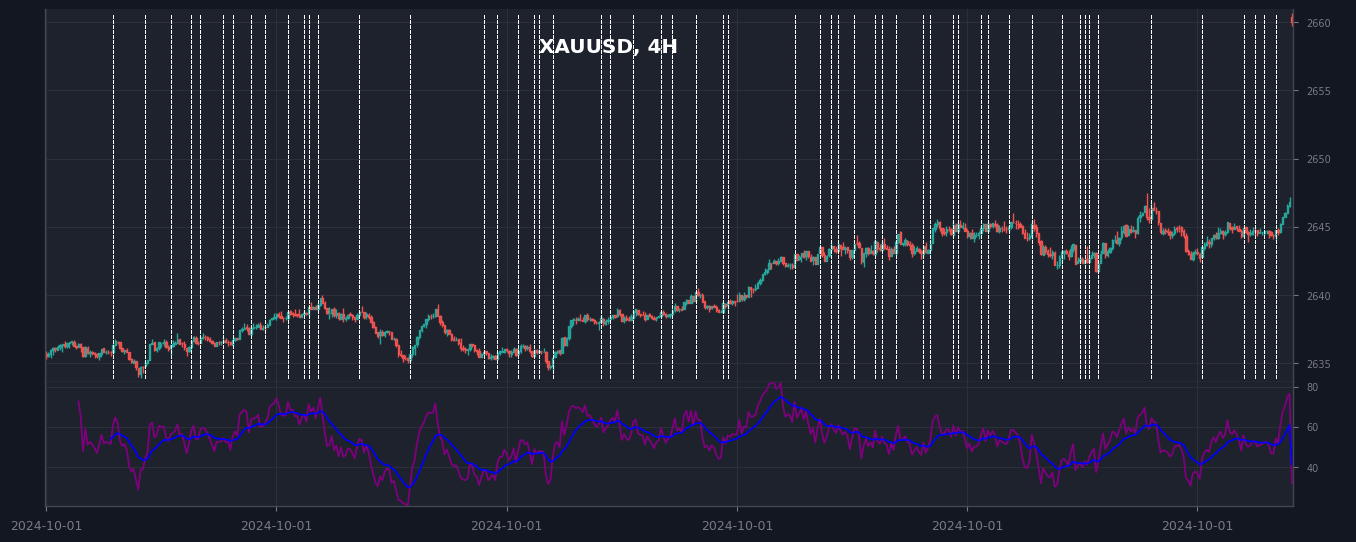

2025-09-26 15:05:34,218 - INFO - Chart 7747831c-1521-4870-94e1-dd4b32cfc59c generated successfully in 1.00s


In [12]:
# --- TradingView Configuration ---
tradingview_config_4H = {
    'title': 'XAUUSD, 4H',                # TradingView style title
    'style': tradingview_dark,             # Use dark theme
    'type': 'candle',
    'volume': False,                      # Disable volume bars
    'show_nontrading': False,             # Ensure no extra y-axis spacing
    'datetime_format': '%Y-%m-%d',        # Format x-axis to show date only
    'xlabel': '',                         # Remove x-axis label
    'ylabel': '',                         # Remove y-axis label
    'xrotation': 0                        # Horizontal date labels
}

chartter.plot(
    tokyo,
    addplot = [
        mpf.make_addplot(tokyo['RSI_14'], panel=1, color='purple', ylabel='RSI'),
        mpf.make_addplot(tokyo['EMA_15'], panel=1, color='blue', ylabel='ema15'),
    ],
    config=tradingview_config_4H,
    vlines=dict(
        vlines=signal_times,
        colors='white',
        linewidths=0.7,
        linestyle="--"
    )
)

In [13]:
from SetslX1 import calculate_multi_timeframe_atr_stop

settings = {
    'atr_periods': [7, 14, 21],      # Multiple ATR periods
    'atr_weights': [0.5, 0.3, 0.2],  # Weights for composite ATR
    'adaptive_multiplier': True,
    'rsi_period': 14,
    'momentum_threshold': 70
}

result = calculate_multi_timeframe_atr_stop(
    df=tokyo,
    settings=settings,
    position_type='short'
)

In [14]:
result.tail(3)

,open,high,low,close,volume,RSI_14,EMA_15,RSI_14_crossed_up_EMA_15,composite_atr,atr,rsi,adx,trend_regime,adaptive_multiplier,entry_stop_loss,stop_distance_pct
datetime,,,,,,,,,,,,,,,,
2024-10-01 08:59:00,2645.985,2646.660,2645.985,2646.535,98,74.659377,58.635778,0,0.531091,0.531091,74.659377,15.012076,ranging,2.64,2659.767675,0.5
2024-10-01 09:00:00,2646.492,2647.150,2646.461,2646.808,79,76.579569,60.878752,0,0.547566,0.547566,76.579569,17.636472,ranging,2.64,2660.042040,0.5
2024-10-02 00:00:00,2660.390,2660.663,2659.699,2659.985,138,31.876259,41.330661,0,1.910007,1.910007,95.257887,22.807434,ranging,2.64,2673.284925,0.5


In [15]:
dft = result[["open", "high", "low", "close", "volume",'RSI_14_crossed_up_EMA_15'	, "entry_stop_loss"]].copy()

dft["amm"] = dft['entry_stop_loss'] - dft ['close']

dft['TP'] = dft['close'] + dft['amm'] * 2
dft['SL'] = dft['entry_stop_loss']

dft.drop(columns = ['entry_stop_loss'], inplace = True )

In [22]:
import numpy as np

# Get row numbers (integer positions) where the signal is 1
row_numbers = np.where(df['RSI_14_crossed_up_EMA_15'] == 1)[0]
print(row_numbers)


[ 29  43  54  63  67  77  81  89  95 105 112 114 118 136 158 190 196 205
 212 214 220 241 245 255 267 272 282 294 296 325 336 341 344 351 360 363
 369 381 384 394 396 406 409 418 431 433 443 447 454 459 463 479 486 492
 507 523 527 531]


In [ ]:
signal = dft[dft['RSI_14_crossed_up_EMA_15'] == 1]

sl = signal['SL'].values
tp = signal['TP'].values

print([sl, tp])


[array([2649.53175 , 2648.204145, 2649.49356 , 2649.84531 , 2650.04028 ,
       2649.830235, 2649.89154 , 2650.786995, 2650.841265, 2651.95983 ,
       2651.888475, 2652.312585, 2652.471375, 2651.980935, 2648.829255,
       2649.026235, 2648.90463 , 2649.10965 , 2649.13578 , 2649.060405,
       2648.58303 , 2651.502555, 2651.599035, 2652.039225, 2651.98395 ,
       2652.03018 , 2653.42713 , 2652.59298 , 2652.682425, 2656.201935,
       2656.76172 , 2656.83408 , 2656.92453 , 2656.993875, 2657.1999  ,
       2656.9386  , 2657.08131 , 2656.818   , 2656.971765, 2658.35364 ,
       2658.39786 , 2658.123495, 2658.449115, 2658.195855, 2658.4059  ,
       2656.34565 , 2655.83712 , 2655.793905, 2655.92757 , 2655.4914  ,
       2659.600845, 2656.7175  , 2658.16068 , 2657.91948 , 2657.878275,
       2657.96772 ]), array([2662.7135 , 2661.37929, 2662.67512, 2663.02862, 2663.22456,
       2663.01347, 2663.07508, 2663.97499, 2664.02953, 2665.15366,
       2665.08195, 2665.50817, 2665.66775, 2665.174

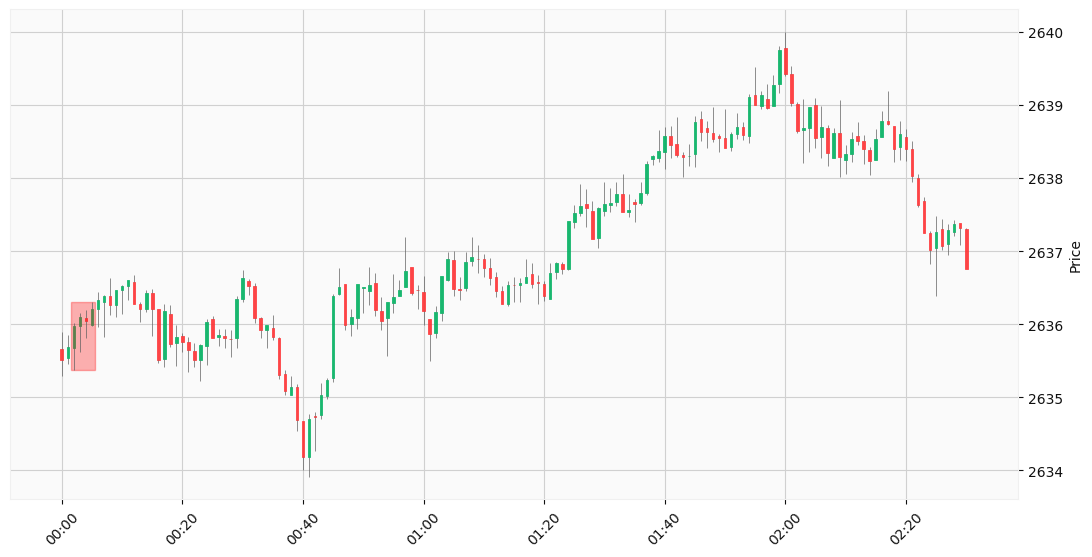

In [19]:
import mplfinance as mpf
import matplotlib.patches as mpatches
import pandas as pd


dta1 = dft.iloc[:151].copy()


# Assuming df is your DataFrame with datetime as index
# Example: box from 3rd to 6th candle
start_idx = 2  # Python index for 3rd candle
end_idx = 5    # Python index for 6th candle

# Determine price range for the rectangle
low_price = dta1['low'][start_idx:end_idx+1].min()
high_price = dta1['high'][start_idx:end_idx+1].max()

# Create a rectangle
def draw_rectangle(ax):
    rect = mpatches.Rectangle(
        (start_idx - 0.5, low_price),        # (x, y) bottom-left
        end_idx - start_idx + 1,             # width
        high_price - low_price,              # height
        color='red', alpha=0.3
    )
    ax.add_patch(rect)

# Plot with mplfinance and draw rectangle on main axes
fig, axlist = mpf.plot(
    dta1,
    type='candle',
    style='yahoo',
    figsize=(14, 7),
    returnfig=True
)
draw_rectangle(axlist[0])

mpf.show()
